# BA 820 Homework 3 (100 Points)

## 1 Latent Dirichlet Allocation [60pts]

In this problem, we will use Latent Dirichlet Allocation to perform topic modeling on Amazon Review datasets. In particular, we will take an in-depth look at different aspects of LDA model.

## 1.1 Installation

To perform LDA and visualize, please use Python 3.X. You will also need to install Numpy, Scipy, gensim, nltk, pyLDAvis library. Refer to requirements.txt for more details.
Use the following code to install the labraries.

In [1]:
%pip install gensim
# install gensim for LDA
%pip install nltk 
# install nltk to preprocess sentences
%pip install pyldavis
# to visualize LDA topics
%pip install matplotlib 
# for plotting

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


The cell below tests if the packages we need have been installed correctly, and that we are in the correct environment.

In [2]:
import gensim
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import nltk
nltk.download("stopwords")
import pyLDAvis
import matplotlib
%matplotlib inline
import gzip # to unzip the data
import re # to replace punctuations
from nltk.corpus import stopwords # list of stopwords

[nltk_data] Downloading package stopwords to /Users/nini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.2 Datasets

You can download the Amazon reviews dataset of Cellphones & Accessory 5-Core Data [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz). Place the downloaded dataset in the same folder as this notebook. You can use the following code to read a datat from GZIp file

In [3]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

## 1.3 Data Cleaning

Now we will preprocess the data using the following steps:
   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

In [4]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    for word in line:
        ### Solution ###
        
        # lowercase all words and remove stopwords and punctuation
        for w in word.lower().split():
            w = re.sub(punctuationRegex, "", w)
            if w not in stopWords:
                # remove words with less than 2 characters
                if len(w) >= 2:
                    filtered_content.append(w)
        ###
    return filtered_content

Finally, we put parse() and clean_line() function together and then extract the first 10,000 reviews into a new text file as your experiment dataset

In [5]:
import string

def read_dataset(fname):
    """ Read the 10000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 10000:
            break
    return exp_dataset

In [6]:
%%time
r = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")
print(r[0])

['look', 'good', 'stick', 'good', 'dont', 'like', 'rounded', 'shape', 'always', 'bumping', 'siri', 'kept', 'popping', 'irritating', 'wont', 'buy', 'product', 'like']
CPU times: user 3.81 s, sys: 435 ms, total: 4.24 s
Wall time: 4.31 s


## 1.4 Topic Analysis

**[5pts] Q1.4.1.1** Use topic numbers 3, 6, 9, 12, 15 respectively and print out all topics with 5 words.

For this We will use gensim to train an LDA model. gensim requires the following steps:

Construct a gensim.corpora.dictionary from the dataset
Construct a gensim "corpus" using this dictionary, by mapping each word to an index in the dictionary
Run LDA on this corpus

In [7]:
dictionary = gensim.corpora.Dictionary(r)
corpus = [dictionary.doc2bow(text) for text in r]

The function below prints the top num words in each topic for a given model.

In [8]:
def print_topic_words(model, num):
    """ print top words in model topics.
    
    Args: 
        model: LDA model
        
    Returns:
        none
    """    
    #########################
    words = model.print_topic(num-1, topn=5)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    print(f'Topic: {num} \nWords: {preprocess_string(words, filters)}')

    #########################
    return

The following function builds multiple LDA models with number of topics specified in the list `num_topics`.

In [9]:
def build_num_topic_model(dictionary, corpus, num_topics):
    """ Build lda model with given parameters, use print_topic_words to print words
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        num_topics: list of numbers
        
    Returns:
        none
    """    
    for num in num_topics:
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num, 
                                               random_state=100,
                                               #update_every=1,
                                               #chunksize=100,
                                               #passes=10,
                                               alpha='auto',
                                               #per_word_topics=True
                                                   )                                        
        print_topic_words(lda_model, num)

In [10]:
build_num_topic_model(dictionary, corpus, [3, 6, 9, 12, 15])

Topic: 3 
Words: ['case', 'mophie', 'doubles', 'iphone', 'bottom']
Topic: 6 
Words: ['phone', 'charger', 'great', 'one', 'use']
Topic: 9 
Words: ['phone', 'camera', 'phones', 'nokia', 'screen']
Topic: 12 
Words: ['headset', 'phone', 'ear', 'sound', 'bluetooth']
Topic: 15 
Words: ['phone', 'use', 'would', 'like', 'one']


**[3pts] Q1.4.1.2**  Explain what could be interpreted for each topics, and describe the similarity and difference between different topic numbers.

The topics are similar in that they all relate to different aspects of mobile phone usage and accessories. However, they differ in their specific focus and purpose.

- Topic 3: Mophie phone cases for iPhone models. This topic specifically focuses on a particular brand of phone cases for iPhone models.
- Topic 6: Best phone chargers for daily use. This topic specifically focuses on the best phone chargers for daily use, regardless of the phone model.
- Topic 9: Comparison of phone cameras and screens for Nokia phones. This topic specifically compares Nokia phone cameras and screens, rather than discussing phone accessories or other devices.
- Topic 12: Best wireless headset for phone audio. This topic focuses on the best wireless headsets for phone audio quality, regardless of the phone model.
- Topic 15: Choosing the right phone for your needs and preferences. This topic is broader in scope, as it covers different factors to consider when choosing a phone that suits your lifestyle and preferences, including the phone's features, plan, and carrier.

**[2pts] Q1.4.1.3**  Which topic number would you choose? Explain.

I would prefer to read about Topic 6 as it addresses a problem I frequently encounter - my phone battery draining quickly. In my opinion, having a good phone charger that could extend my battery life would be very beneficial.

## 1.5 Model Evaluation

**[12 pts] Q1.5.1** Now we investigate two methods to evaluate our model and choose the topic number

1. Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. A low perplexity indicates the probability distribution is good at predicting the sample. We can use model.log_perplexity(document) to evaluate the perplexity of our LDA model.

2. Topic coherence is a one type of interpretability measurement for a topic. It measures if a set of top keywords describe a coherent and singular concept. A good topic will have high topic coherence score. We can use CoherenceModel(model=ldamodel).get_coherence() to calculate it.

Plot Perplexity and topic coherence scores of our LDA model for topic number 3,6,9,12,15,20,50.

The code below trains topic models with different numbers of topics and measures their coherence and perplexity.

In [11]:
# perplexity 
# run different number of topics to get perplexity and coherence value for this model
from gensim.models.coherencemodel import CoherenceModel

def get_measurement_for_model(dictionary, corpus, topic_nums):
    """ Build lda model with given parameters 
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        topic_nums: a list contains all possible topic number
        
    Returns:
        2 lists: one of perplexities, and one of coherence value
    """  
    perplexity = []
    coherence_value=[]
    for num_topic in topic_nums:
        
        #########################
           # YOUR CODE HERE
        #   - Build model
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topic, 
                                               random_state=69,
#                                                update_every=1,
#                                                chunksize=100,
#                                                passes=10,
                                                alpha='auto',
#                                                per_word_topics=True
                                                   )
#         build_num_topic_models(dictionary, corpus, num_topic)
                        
        
        
        #   - Compute and store coherence
        coherence_model_lda = CoherenceModel(model=lda_model, texts=r, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_value.append(coherence_lda)
        
        #   - Compute and store perplexity
        perplexity.append(lda_model.log_perplexity(corpus))
        #########################
    return perplexity,coherence_value

In [12]:
perplexity, coherence = get_measurement_for_model(dictionary, corpus, [3, 6, 9, 12, 15, 20, 50])

In [13]:
print(perplexity)
print(coherence)

[-8.707141384904688, -8.405065074863696, -8.79516472567271, -8.922134281252172, -9.115919765982795, -9.3848202565316, -11.341971313263757]
[0.44607764247551884, 0.35615045903330955, 0.34308623191309073, 0.3333377882999596, 0.3550526347997419, 0.34568225490681337, 0.3520482874206474]


We can now plot the coherence and perplexity of each model.

In [14]:
import matplotlib.pyplot as plt

/Users/howardzonda/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/howardzonda/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


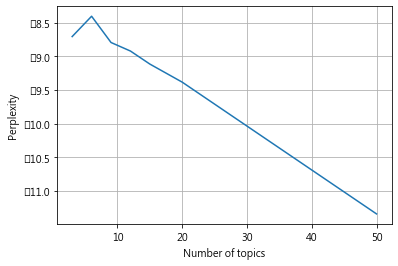

In [15]:
plt.plot([3, 6, 9, 12, 15, 20, 50], perplexity)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.show()

**[2pts] Q1.5.2**  From the above graph what topic number would you choose and why? Is it a good idea to choose the topic number based on perplexity? why or why not?

If we were asked to choose on the preceding graph, we would select topic number = 50, which has the lowest perplexity score among the other numbers. But, while choosing a topic number, we also need to consider the coherence score, as even a score when topic numbers = 50 indicates low perplexity. Still, if the text is not coherent, it may not give us a topic idea. If knowing the topic is more important than how a good model fits, we should not choose topics simply based on their perplexity.

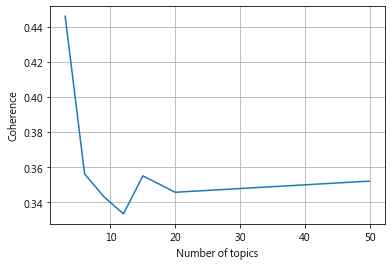

In [16]:
plt.plot([3, 6, 9, 12, 15, 20, 50], coherence)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

**[2pts] Q1.5.3**  From the above graph what topic number would you choose and why?

From the above topic we would choose topic number = 3 as it has the highest coherence score, which would help to identify the idea of topic.

**[4pts]Q1.5.4** Compare two methods you implemented in the previous quesions, which one do you think is better and why? In answering, please discuss the actual topics generated.

Based on the two previous methods, selecting a topic based on its coherence score is better, as it will give us a better idea of the topic, and we would like to know the topic. Perplexity fits the model, and fitting the model is good, but knowing the idea, we believe, is more important. For example, topic number 3 gives us the idea that the topic is about the phone case of a brand, whereas topic number 50 gives little idea of the topic even though it has the lowest perplexity.

## 1.6 Alpha and Beta in LDA

**[7pts]Q1.6.1** In this problem, we will check the two most important parameters in LDA model: alpha and beta. Alpha represents document-topic density - with a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Beta represents topic-word density - with a high beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words.

In [17]:
best_topic_num = 3 # CHANGE THIS

In [18]:
#model 1
model1 = None
#########################
# YOUR CODE HERE
lda_model_1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=best_topic_num, 
                                               random_state=69,
#                                                update_every=1,
#                                                chunksize=100,
#                                                passes=10,
                                               alpha=1/best_topic_num, eta =best_topic_num,
#                                                per_word_topics=True
                                             )

# words = lda_model_1.print_topic(best_topic_num-1, topn=5)
print(print_topic_words(lda_model_1, best_topic_num))
#########################

Topic: 3 
Words: ['headset', 'ear', 'bluetooth', 'sound', 'one']
None


In [19]:
#model 2
model2 = None
#########################
# YOUR CODE HERE
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=best_topic_num, 
                                               random_state=69,
#                                                update_every=1,
#                                                chunksize=100,
#                                                passes=10,
                                               alpha=1/2, eta = 1/5,
#                                                per_word_topics=True
                                             )

print(print_topic_words(lda_model_2, best_topic_num))

#   - Build model for alpha = 1/2, eta = 1/5
#   - Print top words
#########################
#########################

Topic: 3 
Words: ['case', 'iphone', 'mophie', 'battery', 'doubles']
None


In [20]:

#model 3
model3 = None
#########################
lda_model_3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=best_topic_num, 
                                               random_state=69,
#                                                update_every=1,
#                                                chunksize=100,
#                                                passes=10,
                                               alpha= 'auto', eta = 'auto',
#                                                per_word_topics=True
                                             )

print(print_topic_words(lda_model_3, best_topic_num))


#   - Build model for alpha = 'auto' = eta
#   - Print top words
#########################

Topic: 3 
Words: ['case', 'mophie', 'iphone', 'doubles', 'shed']
None


**[3pts]1.6.2**  Explain how the different alpha and beta values theoretically influence the LDA model. Then describe what you find in the empirical result (e.g difference in topic words and topics)

Alpha is a hyperparameter that assigns topics to documents. It affects the probability of a document having a specific topic. Specifically, a high alpha value encourages documents to contain a mixture of more topics, while a low alpha value encourages documents to be dominated by a smaller set of topics. So, if we have a low alpha in setting we might get more specific topics, whereas setting it to a high value can result in more general and diverse topics.

Beta influences the probability of a topic containing a particular word. A high beta value allows topics to contain a mixture of more words, while a low beta value allows topics to have a smaller set of words. So, setting beta to a low value can result in more distinct and coherent topics, while setting it to a high value can result in more generic and overlapping topics.
For example, model 1 has very low alpha and give much explaination for the topic, similarly second model gives even more precise idea as it has lower beta as well compared to model1.

## 1.7 LDA on a short text dataset

**[10pts]1.7.1** In this part, we will read a dataset from twitter and build a LDA model. On Windows, download and unzip the dataset from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). Place the downloaded dataset in the same folder as this notebook. Use the first 10,000 lines in the "training.1600000.processed.noemoticon.csv" file. 

In [21]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip # Linux and OSX only
!unzip trainingandtestdata.zip # Linux and OSX only

/bin/sh: wget: command not found
unzip:  cannot find or open trainingandtestdata.zip, trainingandtestdata.zip.zip or trainingandtestdata.zip.ZIP.


In [28]:
import urllib.request
url = 'http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip'
filename = 'trainingandtestdata.zip'
urllib.request.urlretrieve(url, filename)
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [29]:
!head -n 10000 training.1600000.processed.noemoticon.csv > twitter.csv # Linux and OSX only

In [30]:
def convert(character):
 
    # initialization of string to ""
    string = ""
 
    # traverse in the string
    for x in character:
        string += x
 
    # return string
    return string

In [31]:
def read_twitter(fname):
    """ Read the given dataset into list and clean stop words. 
    
    Args: 
        fname (string): filename of Twitter Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    twitter = []
    with open(fname, encoding="utf-8") as f:
        for line in f:
            tweet = line.split(",")[5].strip()
            tweet_text = convert(tweet)
            tweet = tweet.split(" ")
            # Remove @s and URLs
            tweet_text = [re.sub(r'^@|[^\w\s]|http\S+', '', word) for word in tweet]
            # Remove stopwords
            stops = stopwords.words('english')
            stops.extend(['n\'t', '|', '#', '\'s', '\"', '\'re', '\'ve', '\'ll', '\'d', 'n', 'u'])
            tweet_text = [word for word in tweet_text if word.lower() not in stops and word.lower() != ""]
            # tweet_text = convert(tweet_text)
            twitter += tweet_text

            #for word in twitter:
            ########################
            # YOUR CLEANING CODE HERE
            #    - Clean tweet
            #    - Split into list words
            #    - Store list in twitter
            ########################
    return twitter

In [32]:
%%time
twitter = read_twitter('twitter.csv')

CPU times: user 1.51 s, sys: 314 ms, total: 1.82 s
Wall time: 1.85 s


In [33]:
import gensim
import gensim.corpora as corpora
tweet_split = [tweet.split() for tweet in twitter]
twitter_dictionary = corpora.Dictionary(tweet_split)# TODO: build dictionary
twitter_corpus = [twitter_dictionary.doc2bow(tweet) for tweet in tweet_split] # TODO: build corpus for model

In [34]:
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=twitter_corpus,
                                           id2word=twitter_dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
########################
# YOUR CODE HERE
#    - Build model
#    - Print top words
########################

CPU times: user 2min 16s, sys: 1.15 s, total: 2min 17s
Wall time: 2min 19s


In [35]:
def print_topic_words(model, num):
    """ print top words in model topics.
    
    Args: 
        model: LDA model
        
    Returns:
        none
    """    
    #########################
    words = model.print_topic(num-1, topn=10)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    print(f'Topic: {num} \nWords: {preprocess_string(words, filters)}')

    #########################
    return

In [36]:
for i in range(1, 11):
  print_topic_words(lda_model, i)

Topic: 1 
Words: ['im', 'watch', 'didnt', 'also', 'hurt', 'feels', 'dvds', 'bits', 'early', 'castiel']
Topic: 2 
Words: ['see', 'love', 'dvds', 'early', 'bits', 'dandy', 'sephy', 'spell', 'rainboot', 'stuffing', 'colleague']
Topic: 3 
Words: ['first', 'bit', 'shylands', 'tornadoliese', 'outmy', 'qs', 'sends', 'aweber', 'tit', 'problogger']
Topic: 4 
Words: ['wish', 'rainboot', 'bits', 'dvds', 'spell', 'tweeted', 'early', 'clean', 'stuffing']
Topic: 5 
Words: ['work', 'day', 'im', 'get', 'sad', 'today', 'going', 'night', 'dont', 'want']
Topic: 6 
Words: ['got', 'like', 'long', 'body', 'dvds', 'bits', 'early', 'windsor', 'castiel', 'stuffing']
Topic: 7 
Words: ['thought', 'many', 'might', 'aweber', 'silent', 'dave', 'shylands', 'tornadoliese', 'outmy', 'qs', 'kg']
Topic: 8 
Words: ['hey', 'problogger', 'whatnot', 'tornadoliese', 'outmy', 'qs', 'sends', 'aweber', 'silent', 'dave', 'realized']
Topic: 9 
Words: ['cant', 'always', 'wanted', 'dvds', 'bits', 'early', 'tweeted', 'castiel', 'jaw

## 1.8 LDA visualization

**[10pts]1.8.1** We will now visualize the LDA output using pyLDAvis. PyLDAVis shows the following:

   1. The distances between topics, as a map in 2-D space.
   2. The variance in the topic-word distribution, as the size of a circle in this map.
   3. The most "salient" terms in each topic.

In [39]:
%%time
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models

CPU times: user 8.5 ms, sys: 7.18 ms, total: 15.7 ms
Wall time: 23.7 ms


In [40]:
%%time
data = None
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, twitter_corpus, twitter_dictionary)
########################
# YOUR CODE HERE
#   - Initalize pyLDAvis with your model
#   - Make sure to use a subset of the sentences in the dataset
#     if your pyLDAvis call in the cell below is taking too long
########################

/Users/howardzonda/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/howardzonda/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/Users/howardzonda/opt/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


CPU times: user 3.26 s, sys: 166 ms, total: 3.42 s
Wall time: 6.98 s


In [41]:
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_display)

# 2.word2Vec [40pts]


In this problem, we use Amazon Review Dataset to perform Word2Vec and Doc2Vec to extract insights relevant for e-commerce business. For this question, download and use the dataset [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz||reviews_Electronics_5.json.gz).

## 2.1 Data Cleaning



The following code reads the data from a GZIP file.

In [4]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

We will now read the data and preprocess it using the following steps:

   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

   And finally extract 10000 reviews.

In [5]:
# A function to clean a single line of text
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import STOPWORDS


def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    line = line.split(" ")
    filtered_content = []
    stop_words = STOPWORDS
    punctuationRegex = r'\W+|\d+' # Regular expression to match punctuation and digits


    for word in line:
      word = word.lower()
      word = re.sub(punctuationRegex, '', word) # Remove punctuation and digits
      if word not in stop_words and word != '' and len(word) >= 2:
        filtered_content.append(word)

        
    return filtered_content

def read_dataset(fname):
    """ Read the 100000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    #print('123')
    for review in parse(fname):
        # if(count == 0):
        #   print('review:', review, '\n')
        line = review["reviewText"]
        # if(count == 0):
        #   print('line', line, '\n')
        new_line = clean_line(line)
        # if(count == 0):
        #   print('new line', new_line, '\n')
        exp_dataset.append(new_line)
        count += 1
        if count > 100000:
            break
    return exp_dataset    

In [6]:
%%time
r = read_dataset("reviews_Electronics_5.json.gz")

#Desktop/22_courses/BA820_Unsupervised_and_Unstructured_Machine_Learning/HW3/reviews_Electronics_5.json.gz

CPU times: user 14.9 s, sys: 251 ms, total: 15.1 s
Wall time: 15.2 s


## 2.2 Build a doc2vec model

**[3pts]2.2.1** In this question, first we will build a Word2Vec model using ginsim using size=300, min_count=40, win- dow=10, negative=10, max_vocab_size=10000. Train the model for 30 epochs.

In [7]:
from gensim.models import Word2Vec
# YOUR CODE HERE
model = Word2Vec(r, vector_size= 300, min_count= 40, window= 10, negative= 10, max_vocab_size=10000)

**[2pts]2.2.2** Use model.wv.doesnt_match to find a word in ["Canon","Nikon","junk"] that does not

belong.

In [8]:
# YOUR CODE HERE ["Canon", "Nikon", "junk"]
model.wv.doesnt_match(['canon', 'nikon', 'junk'])

'junk'

**[3pts]2.2.3** Come up with 3 other word lists and apply the above function. Explain your observation.

In [9]:
# write your code here
print("functionality, software, route, who doesn't belong: ", 
      model.wv.doesnt_match(['functionality', 'software', 'route']))

functionality, software, route, who doesn't belong:  route


In the three words of the list, `functionality, software, and route`, software and functionality is close to each other since when reviewing a software, we often evaluate its functionality. Therefore, the word route is the one.

In [10]:
print("drive, better, truck, who doesn't belong: ", model.wv.doesnt_match(['drive', 'better', 'truck']))

drive, better, truck, who doesn't belong:  better


In the three words of the list, `drive, better, and truck`, drive and truck is closer to each other since when talking about truck, we are likely to mentioned the driving experience. While better can be used to review truck, it's more general.

In [11]:
print("drive, better, truck, who doesn't belong: ", model.wv.doesnt_match(['tv', 'hdmi', 'room']))

drive, better, truck, who doesn't belong:  room


In the three words of the list, `TV, HDMI, and room`, TV and HDMI is closer to each other since almost every TV nowadays includes a HDMI port, and it's a key thing to look at when reviewing. While room is more general and can appear in many other review as well.

**[2pts]2.2.4** What are some tasks in e-commerce that can be solved with this simple function?

- Using the function to check whithin the 3 product, which one is more relevant. We can use the relevant products pair to recommend.
- Feeding the function a list of a product and serveral features. See which feature is less relevant. By doing so, we get to know what people are looking for when purchasing the product.

## 2.3 Build a doc2vec model

**[15 pts] 2.3.1**  Each review is marked by other customers as “helpful” or not. The "helpful: [a, b]" item in each review is (a) the number of people who marked the review as helpful, and (b) the total number of people who have marked the review as helpful or unhelpful. The "helpfulness" score of a review can be calculated as a/b. Define a "helpful" review as one with helpfulness score >= 0.8. Given a review that is only slightly helpful, could we find textually similar reviews but have higher helpfulness? Build Doc2Vec model with gensim on review data. Use product ID “B00006I5WJ” and ReviewerID with “A14453U0KFWF31” as an example, find top 5 helpful reviews of the same product with similarity score above 0.8. 

In [12]:
import os
def read_reviewers_data(fname, min_count=0):
    '''
    Save all reviews into their own product asin files.
    Make sure you have 'product' folder when you run this answer.
    In each file, you can choose your own log structure. In this answer, log strucutre is like 
        "reviewText"\t"reviewerID"\t"helpful"
    Args: 
        fname: dataset file path
        min_count: minimum number of reviews of a product
    Returns:
        none
    '''
    if not os.path.isdir('product'):
        os.makedirs('product')
    asin_list = []
    tmp_list = []
    last_asin = ""
    j = 0
    for i in parse(fname):
        if last_asin != i['asin']:
            if len(tmp_list) > min_count:
                f = open("product/" + last_asin+".txt", 'w')
                for one in tmp_list:
                    f.write(one)
                f.close()
            tmp_list = []
            last_asin = i['asin']
        tmp_list.append(i["reviewText"] + '\t' + i["reviewerID"] +
                    '\t' + handle_helpful(i["helpful"]) + "\n")
        j += 1
        if j > 100000:
            break
            
def handle_helpful(helpful):
    '''
    Helper function for helpful_score calculate
    Args: 
        helpful: list. The first element is the number of people think this is helpful. The second element
            is the total number of people evaluate this comment
    Returns:
        String: number represent helpfulness
    '''
    if helpful[1] != 0:
        helpfulness = 1.0 * helpful[0] / helpful[1]
        return str(helpfulness)
    else:
        return str(0)

In [13]:
read_reviewers_data("reviews_Electronics_5.json.gz")

In [14]:
class TaggedReviewDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, dirname):
        self.dirname = dirname
        self.helpfulness = {}  # key:reviewerID value:helpfulness
        self.product = {}      # key:asin value:reviewerID
        self.asin = []

    def __iter__(self):
        for filename in os.listdir(self.dirname):
            asin_code = filename[:-4] #delete ".txt"
            self.product[asin_code] = []
            self.asin.append(asin_code)
            for line in enumerate(open(self.dirname + "/" + filename)):
                line_content = line[1].split("\t")
                self.product[asin_code].append(line_content[1])
                self.helpfulness[line_content[1]] = float(line_content[2])
                yield TaggedDocument(clean_line(line_content[0]), [line_content[1], line_content[2]])


In [15]:
documents = TaggedReviewDocument("product")

In [49]:
%%time
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
# YOUR CODE HERE
model = Doc2Vec(vector_size=5, min_count=10, epochs=10)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 4min 2s, sys: 9.66 s, total: 4min 12s
Wall time: 3min 19s


## Find similar reviews

In [50]:
def find_similar_reviews(asin,reviewer_id):
    '''
    If one review is similar to the specefic review and it is much helpful, save it to a list
    Args: 
        asin: product asin
        reviewer_id: the specific review
    Returns:
        list of reviewer id
    '''
    result = []
    ########################
    reviews_for_asin = documents.product[asin]
    similar_reviews = []
    reviews_similarity = model.dv.most_similar(reviewer_id, topn=len(model.dv))
    for rev in reviews_similarity:
        # filter for similarity score > xx & is for the same product
        if (rev[0] in reviews_for_asin) & (rev[1] > 0.8) & (rev[0] != reviewer_id):
            similar_reviews.append(rev)
    
    # filter for helpful reviews only and build a dictionary
    helpful_reviews = {} # reviewer_id: helpfulness score
    for rev in similar_reviews: 
        if documents.helpfulness[rev[0]] >= 0.8:
            helpful_reviews.update({rev[0]: documents.helpfulness[rev[0]]})
    
    # Review with top 5 helpfulness
    result = dict(sorted(helpful_reviews.items(), key=lambda x: x[1], reverse=True)[:5])

    ########################
    return result

In [51]:
print(find_similar_reviews("B00006I5WJ", "A14453U0KFWF31")) 

{'A1ZJSYEQQDIDAA': 1.0, 'A3GTQ229J3PFN8': 1.0, 'A1XX32LG8E078Y': 1.0, 'A3I4TQNEO4G6LT': 1.0, 'A2A0HREDAG2QIC': 1.0}


## 2.4 Build a doc2vec model using product descriptions


**[10pts]2.4.1** Use product descriptions (located in meta data  [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz)) to build a Doc2Vec model. When building the doc2vec model, use vector_size=100, window=15, min_count=5, max_vocab_size=1000, and train it for 1 epoch.

In [31]:
def read_product_description(fname):
    '''
    Load all product descriptions
    Args: 
        fname: dataset file path
    Returns:
        dict: key is asin, value is description content
    '''
    result = {}
    for i in parse(fname):
        try:
            if "Camera & Photo" in i["categories"][0]:
                result[i["asin"]]=i["description"]
        except:
            continue
    return result

In [32]:
class TaggedDescriptionDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, descriptondict):
        self.descriptondict = descriptondict
        

    def __iter__(self):
        for asin in self.descriptondict:
            for content in self.descriptondict[asin]:
                yield TaggedDocument(clean_line(content), [asin])


In [33]:
description_dict = read_product_description("meta_Electronics.json.gz")
des_documents = TaggedDescriptionDocument(description_dict)

In [43]:
# Build a doc2vec model
# YOUR CODE HERE
des_model = Doc2Vec(vector_size=100, window=15, min_count=5, max_vocab_size=1000, epochs=1)
des_model.build_vocab(des_documents)
des_model.train(des_documents, total_examples=des_model.corpus_count, epochs=des_model.epochs)

**[5pts]2.4.2** Find the most similar product for Canon EOS 5D (asin:B0007Y791C) not made by Canon.

In [44]:
#Write your code here

In [45]:
def read_product_title(fname):
    '''
    Load all product descriptions
    Args: 
        fname: dataset file path
    Returns:
        dict: key is asin, value is title of the product
    '''
    result = {}
    for i in parse(fname):
        try:
            if "Camera & Photo" in i["categories"][0]:
                result[i["asin"]]=i['title']
        except:
            continue
    return result

In [46]:
product_titles = read_product_title("meta_Electronics.json.gz")

In [47]:
def find_similar_product_not_by_canon(base_product_id):
    product_similarity = des_model.dv.most_similar(base_product_id, topn=1000)
    for product_id in product_similarity[0]:
        if 'canon' not in product_titles[product_id].lower():
            return product_id

In [48]:
find_similar_product_not_by_canon('B0007Y791C')

'B001BP1YEE'